In [ ]:
import pandas as pd

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

import pickle

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/datasets/crediccardfraud/fraudTrain.csv', low_memory=False, index_col=0)
df_test = pd.read_csv('/content/drive/MyDrive/datasets/crediccardfraud/fraudTest.csv', low_memory=False, index_col=0)

In [ ]:
df_train.shape, df_test.shape

((1296675, 22), (555719, 22))

In [ ]:
list(df_train.columns) == list(df_test.columns)


True

In [ ]:
df = pd.concat([df_train, df_test],ignore_index=True)

In [ ]:
df.shape

(1852394, 22)

In [ ]:
df.is_fraud.value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

Data Cleaning

In [ ]:
def clean_df(df):
    return df.drop(['cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],axis=1)

df = clean_df(df)

In [ ]:
df.head(2)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   merchant    object 
 1   category    object 
 2   amt         float64
 3   gender      object 
 4   lat         float64
 5   long        float64
 6   city_pop    int64  
 7   job         object 
 8   unix_time   int64  
 9   merch_lat   float64
 10  merch_long  float64
 11  is_fraud    int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 169.6+ MB


In [ ]:
train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
train.shape, test.shape

((1481915, 12), (370479, 12))

In [ ]:
def encode(df):
    df_obj = df.select_dtypes(include=['object'])
    encoders = {}
    for col in df_obj.columns:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
        encoders[col] = encoder
    with open('LE_mdl_v1.pkl', 'wb') as f:
        pickle.dump(encoders, f)
    return df

train = encode(train)

In [ ]:
train.head(2)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,29,4,166.80,1,39.3426,-114.8859,450,254,1371108903,40.088507,-113.895268,0
1,536,11,28.86,0,34.3795,-118.5230,34882,219,1347476946,35.356925,-119.348148,0


Model Training

In [ ]:
x = train.drop(columns=['is_fraud'])
y = train['is_fraud']

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = DecisionTreeClassifier()
model4 = xgb.XGBClassifier()

In [ ]:
def model_train(model, x_train, y_train, x_test, y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    with open(str(model)[:3] + '_mdl.pkl', 'wb') as f:
        pickle.dump(model,f)

In [ ]:
model_train(model1, x_train, y_train, x_val, y_val)

Accuracy Score:  0.9946758079916864
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    294805
           1       0.00      0.00      0.00      1578

    accuracy                           0.99    296383
   macro avg       0.50      0.50      0.50    296383
weighted avg       0.99      0.99      0.99    296383



In [ ]:
model_train(model2, x_train, y_train, x_val, y_val)

Accuracy Score:  0.9976280690862837
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    294805
           1       0.87      0.65      0.75      1578

    accuracy                           1.00    296383
   macro avg       0.93      0.83      0.87    296383
weighted avg       1.00      1.00      1.00    296383



In [ ]:
model_train(model3, x_train, y_train, x_val, y_val)

Accuracy Score:  0.9960827712790544
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    294805
           1       0.63      0.65      0.64      1578

    accuracy                           1.00    296383
   macro avg       0.81      0.82      0.82    296383
weighted avg       1.00      1.00      1.00    296383



In [ ]:
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df_test = pd.read_csv('/content/drive/MyDrive/datasets/crediccardfraud/fraudTest.csv', low_memory=False, index_col=0)


In [41]:
def preprocess_test(df, encoders):
    df = clean_df(df)
    df = encode(df)  # Removed the 'encoders' argument here
    return df

test = preprocess_test(df_test, encoders)

In [42]:



x_test = test.drop(columns=['is_fraud'])
y_test = test['is_fraud']

# Predictions
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)
y_pred4 = model4.predict(x_test)


Logistic Regression:
Accuracy Score: 0.9961401355721147
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



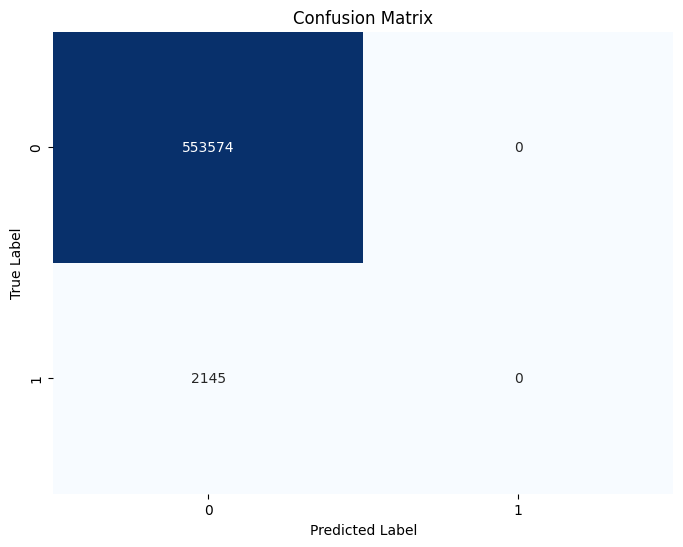

Random Forest:
Accuracy Score: 0.9992388239379975
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.95      0.85      0.90      2145

    accuracy                           1.00    555719
   macro avg       0.98      0.92      0.95    555719
weighted avg       1.00      1.00      1.00    555719



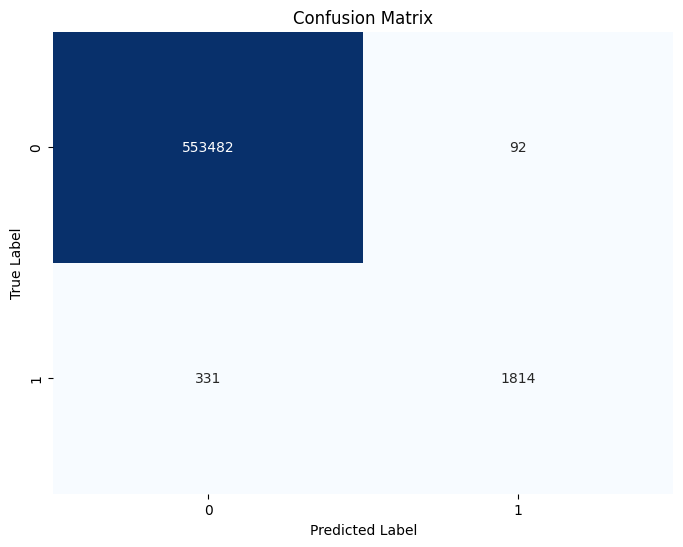

Decision Tree:
Accuracy Score: 0.9984920436407609
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.79      0.84      0.81      2145

    accuracy                           1.00    555719
   macro avg       0.89      0.92      0.91    555719
weighted avg       1.00      1.00      1.00    555719



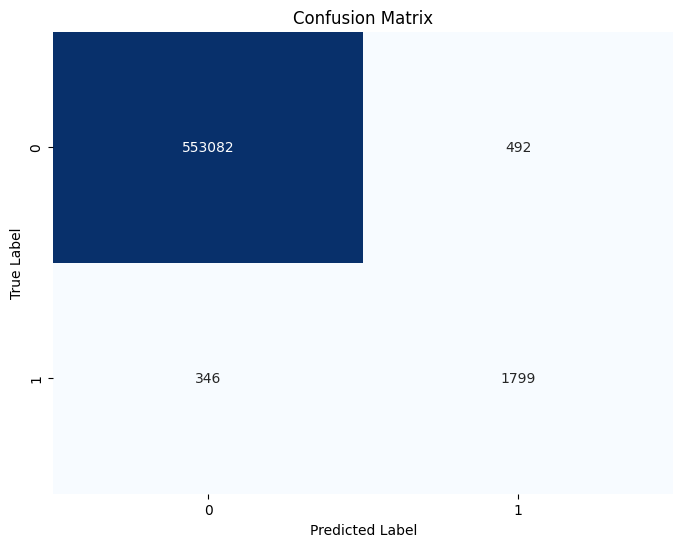

XGBoost:
Accuracy Score: 0.9985046399349311
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.93      0.67      0.77      2145

    accuracy                           1.00    555719
   macro avg       0.96      0.83      0.89    555719
weighted avg       1.00      1.00      1.00    555719



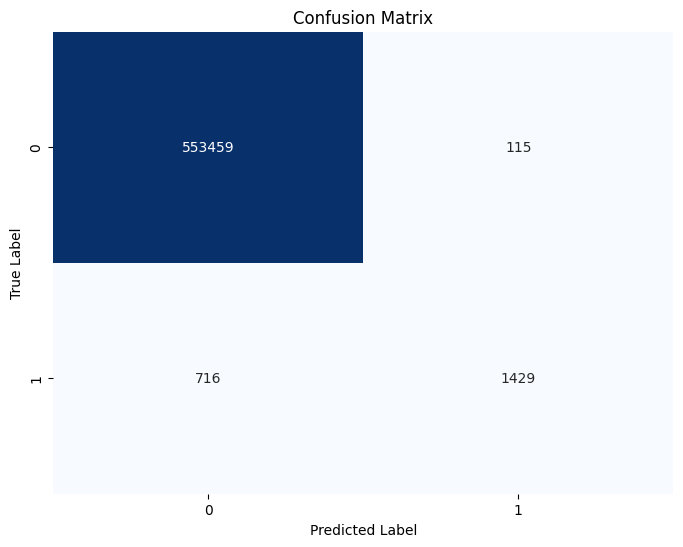

In [45]:
# Evaluation metrics
def evaluate_model(y_true, y_pred):
    print('Accuracy Score:', accuracy_score(y_true, y_pred))
    print('Classification Report:')
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Model 1 - Logistic Regression
print("Logistic Regression:")
evaluate_model(y_test, y_pred1)

# Model 2 - Random Forest
print("Random Forest:")
evaluate_model(y_test, y_pred2)

# Model 3 - Decision Tree
print("Decision Tree:")
evaluate_model(y_test, y_pred3)

# Model 4 - XGBoost
print("XGBoost:")
evaluate_model(y_test, y_pred4)


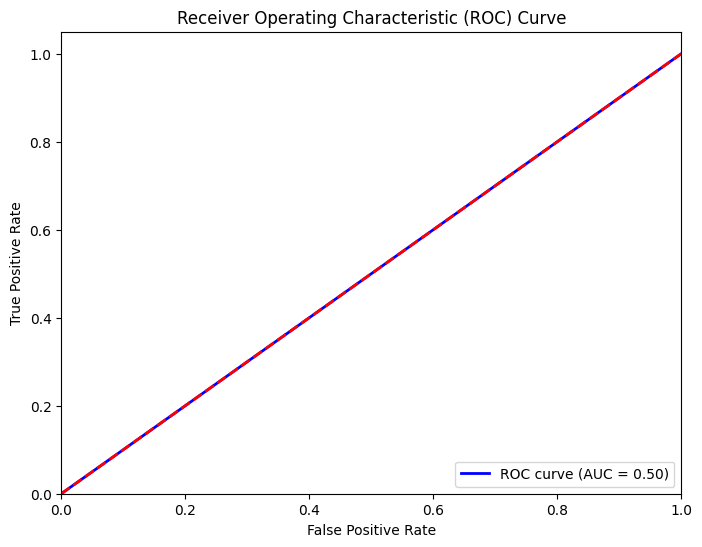

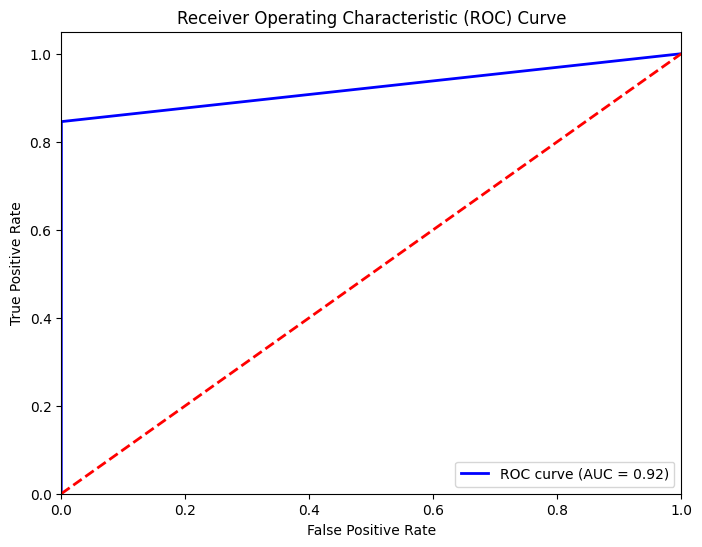

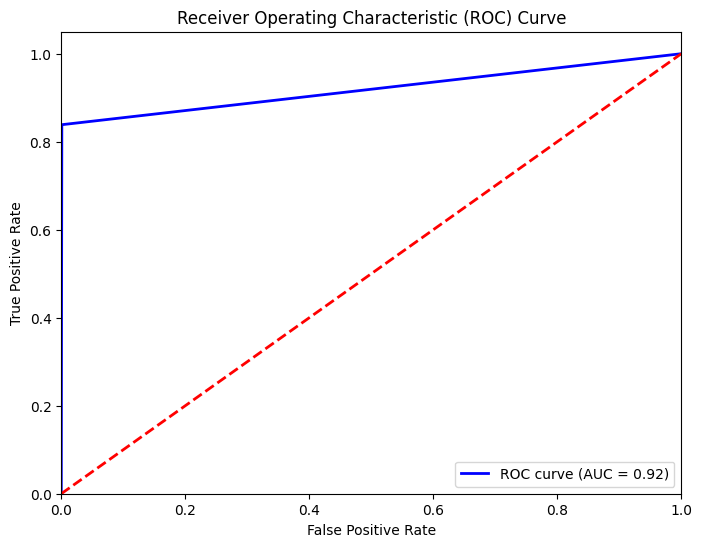

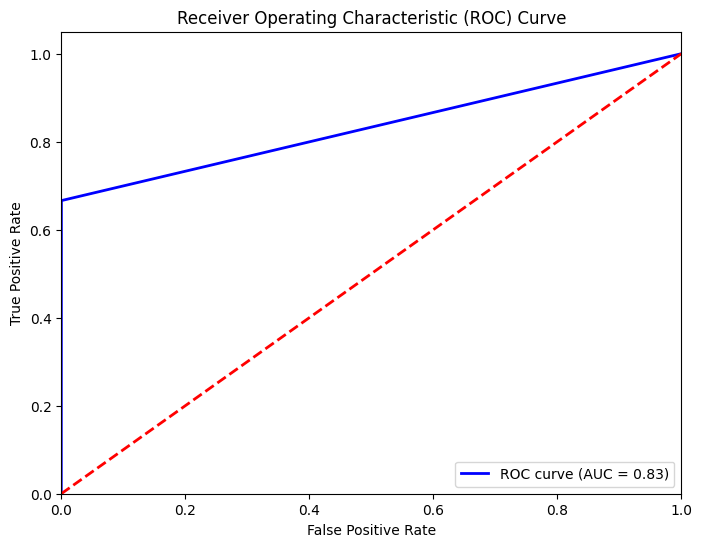

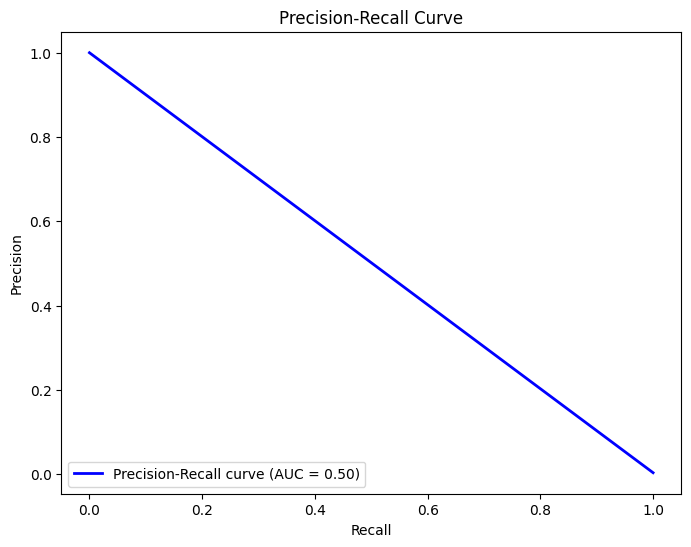

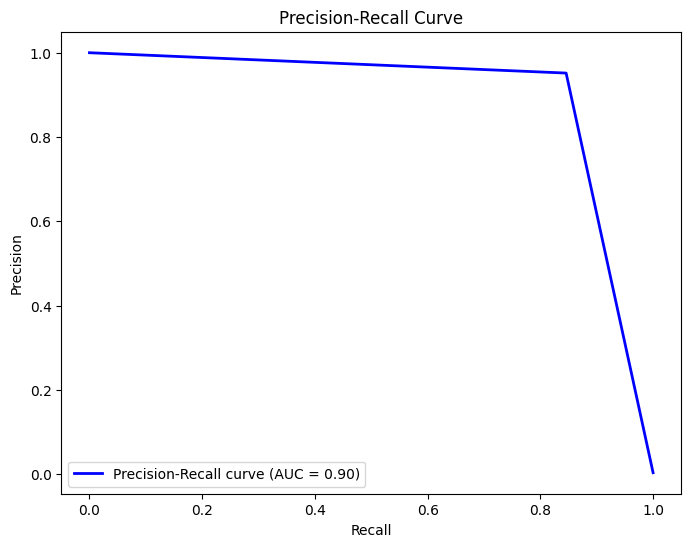

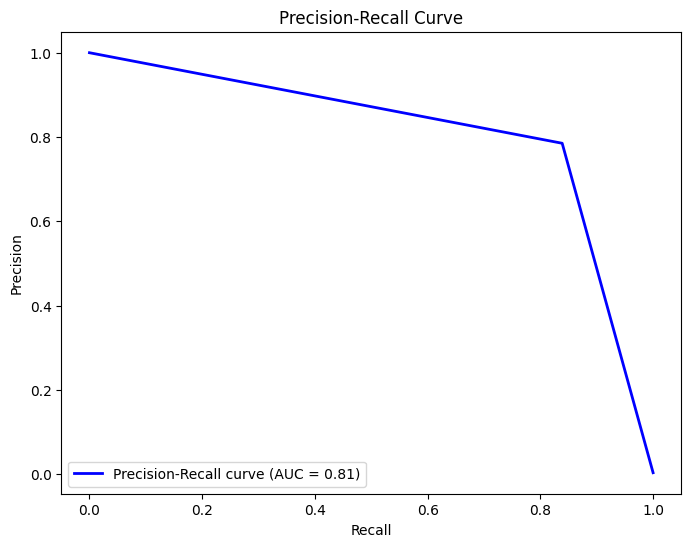

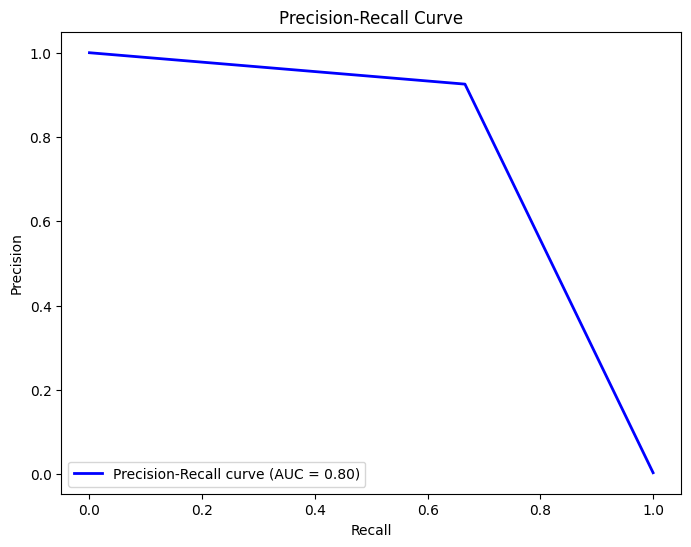

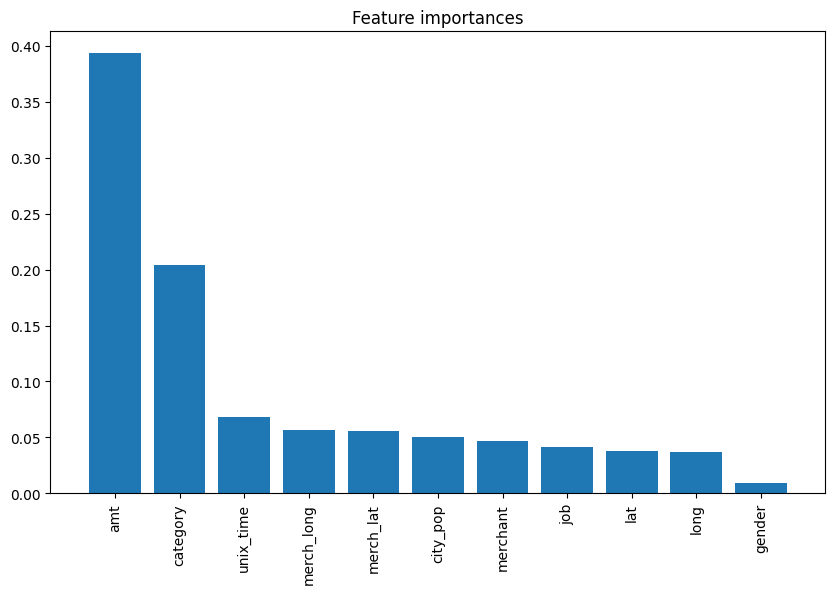

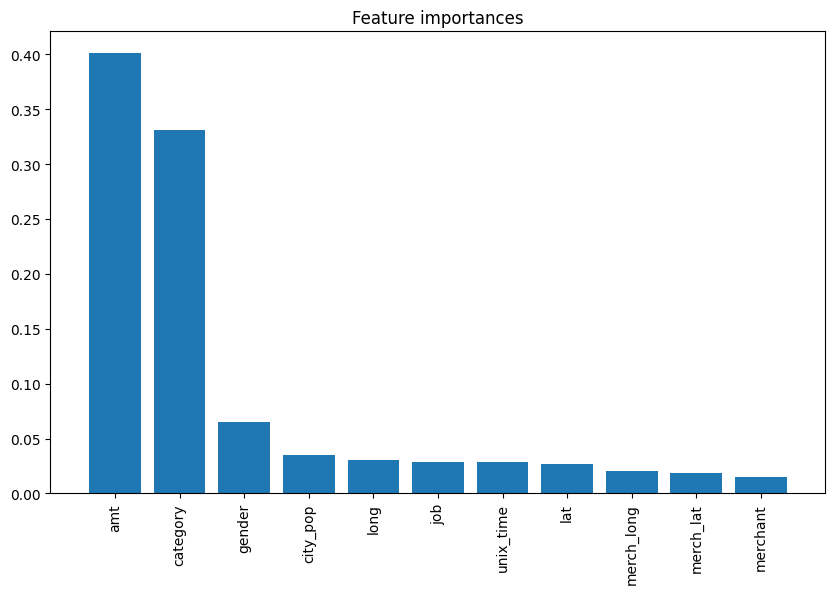

In [47]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import numpy as np


# ROC Curve
def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_pred_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_proba)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()

# Feature Importance Plot
def plot_feature_importance(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(10, 6))
        plt.title("Feature importances")
        plt.bar(range(len(indices)), importances[indices], align="center")
        plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation='vertical')
        plt.xlim([-1, len(indices)])
        plt.show()

# Generate plots for each model
plot_roc_curve(y_test, y_pred1)  # Logistic Regression
plot_roc_curve(y_test, y_pred2)  # Random Forest
plot_roc_curve(y_test, y_pred3)  # Decision Tree
plot_roc_curve(y_test, y_pred4)  # XGBoost

plot_precision_recall_curve(y_test, y_pred1)  # Logistic Regression
plot_precision_recall_curve(y_test, y_pred2)  # Random Forest
plot_precision_recall_curve(y_test, y_pred3)  # Decision Tree
plot_precision_recall_curve(y_test, y_pred4)  # XGBoost

plot_feature_importance(model2, x_test.columns)  # Feature importance for Random Forest
plot_feature_importance(model4, x_test.columns)  # Feature importance for XGBoost


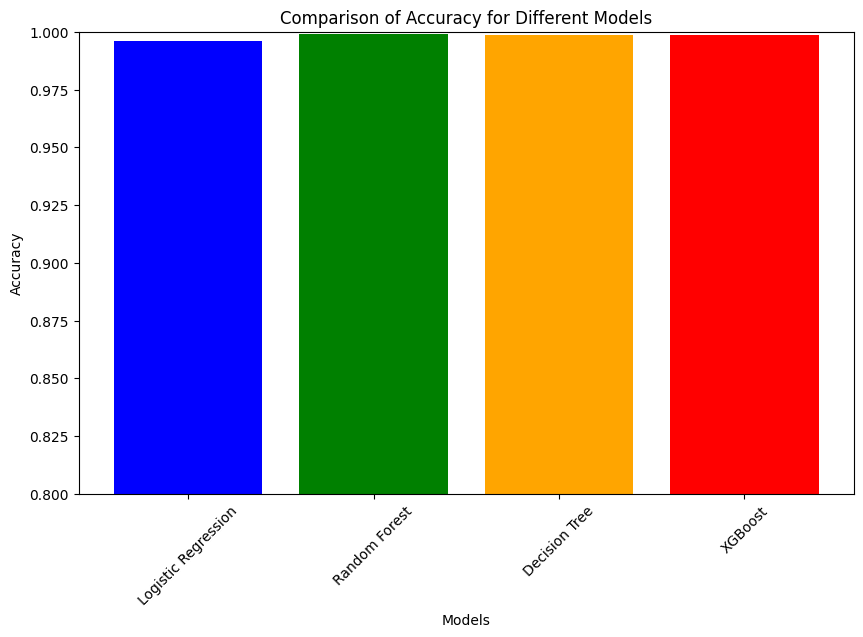

In [48]:
import matplotlib.pyplot as plt

# Accuracy scores for all models
accuracies = {
    'Logistic Regression': accuracy_score(y_test, y_pred1),
    'Random Forest': accuracy_score(y_test, y_pred2),
    'Decision Tree': accuracy_score(y_test, y_pred3),
    'XGBoost': accuracy_score(y_test, y_pred4)
}

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy for Different Models')
plt.ylim(0.8, 1.0)  # Set y-axis limits
plt.xticks(rotation=45)
plt.show()


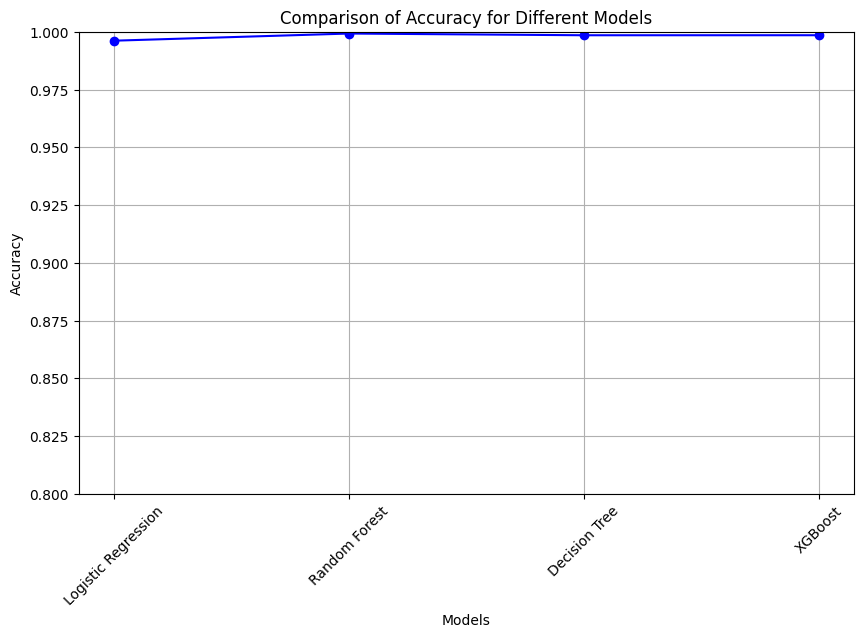

In [52]:
import matplotlib.pyplot as plt

# Accuracy scores for all models
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost']
accuracies = [
    accuracy_score(y_test, y_pred1),
    accuracy_score(y_test, y_pred2),
    accuracy_score(y_test, y_pred3),
    accuracy_score(y_test, y_pred4)
]

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy for Different Models')
plt.grid(True)
plt.ylim(0.8, 1.0)  # Set y-axis limits
plt.xticks(rotation=45)
plt.show()


In [55]:
# Model predictions
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)
y_pred4 = model4.predict(x_test)

# Model accuracy scores
accuracy_scores = {
    'Logistic Regression': accuracy_score(y_test, y_pred1),
    'Random Forest': accuracy_score(y_test, y_pred2),
    'Decision Tree': accuracy_score(y_test, y_pred3),
    'XGBoost': accuracy_score(y_test, y_pred4)
}

# Model with highest accuracy
best_model = max(accuracy_scores, key=accuracy_scores.get)
print("Model with highest accuracy:", best_model)
print("Accuracy:", accuracy_scores[best_model])





Model with highest accuracy: Random Forest
Accuracy: 0.9992388239379975
